Import necessary libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load the dataset (Network Science)

   0  1
0  1  2
1  1  3
2  2  4
3  2  3
4  5  6
Number of nodes: 1461
Number of edges: 2742


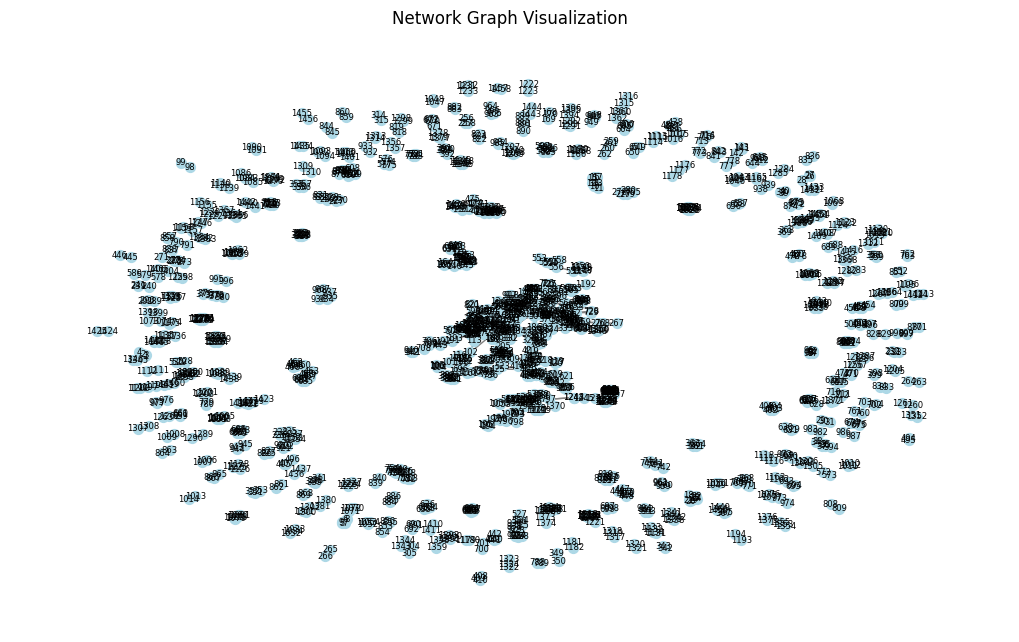

In [22]:
# Load dataset
file_path = '/content/out.dimacs10-netscience'
df = pd.read_csv(file_path, sep="\s+", comment="%", header=None)

# Check the content before passing it to NetworkX
print(df.head())

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df, source=0, target=1)

# Print basic graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=50, node_color="lightblue", edge_color="gray", font_size=6)
plt.title("Network Graph Visualization")
plt.show()

Network Statistics

In [5]:
# Summary Statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = np.mean([d for _, d in G.degree()])
degree_values = [d for _, d in G.degree()]
max_degree = max(degree_values)
min_degree = min(degree_values)
degree_std = np.std(degree_values)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Max degree: {max_degree}, Min degree: {min_degree}")
print(f"Average degree: {avg_degree:.4f}, Standard deviation: {degree_std:.4f}")

Number of nodes: 1461
Number of edges: 2742
Max degree: 34, Min degree: 1
Average degree: 3.7536, Standard deviation: 3.4577


Degree Distribution of the Network

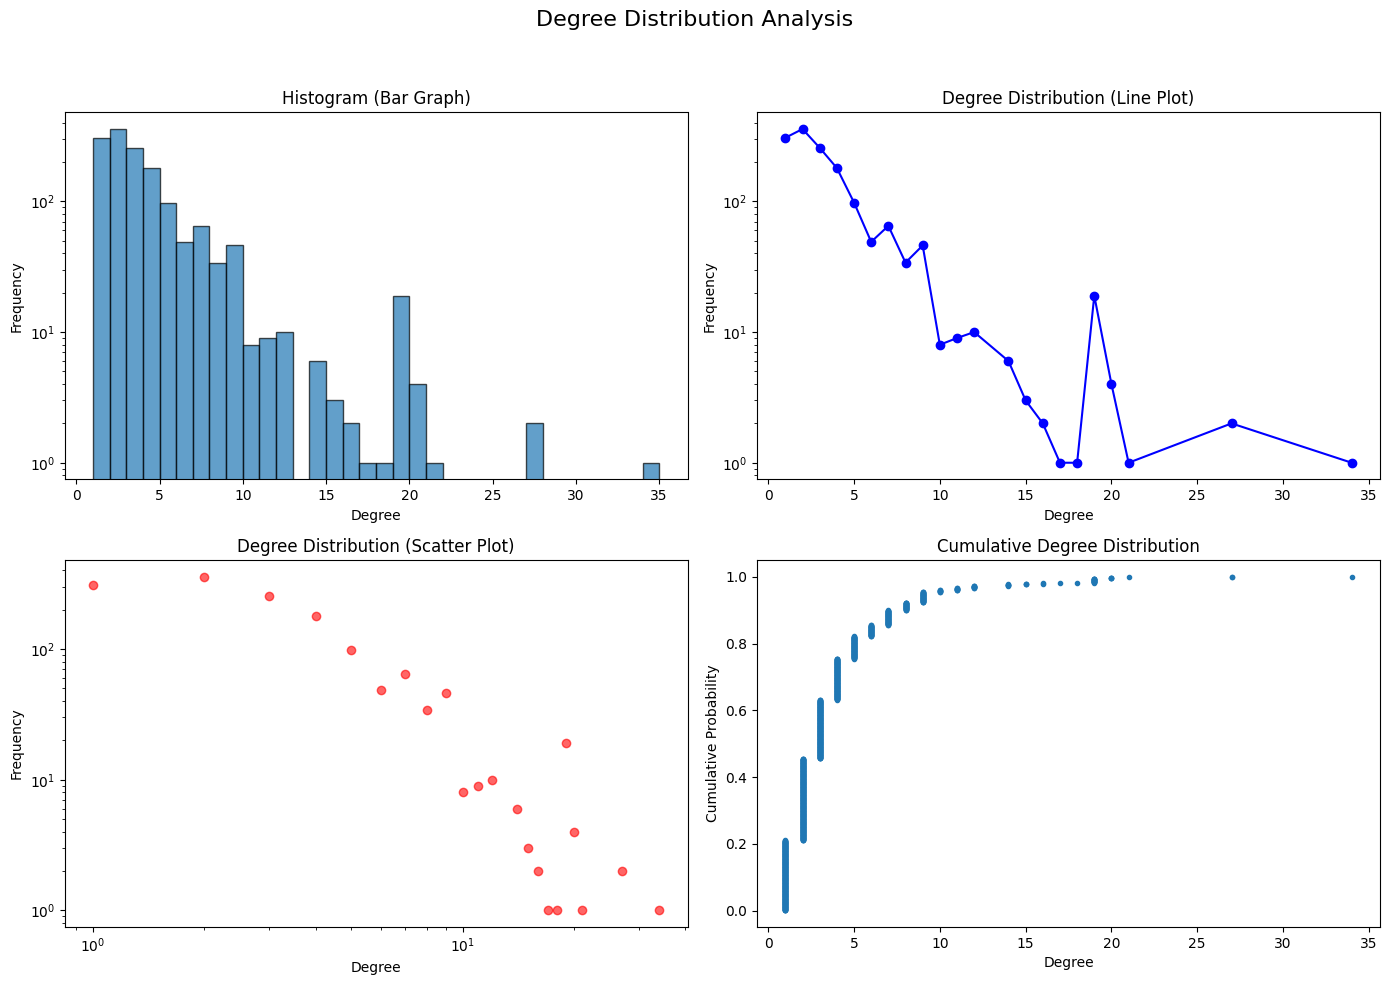

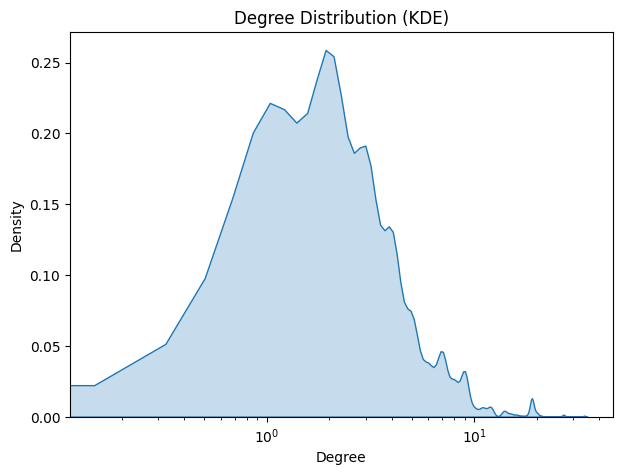

In [7]:
import seaborn as sns

# Extract degree values
degree_values = [d for n, d in G.degree()]
unique_degrees, counts = np.unique(degree_values, return_counts=True)

# Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Degree Distribution Analysis", fontsize=16)

# 1️⃣ Histogram (Bar Graph)
axes[0, 0].hist(degree_values, bins=range(1, max(degree_values) + 2), edgecolor="black", alpha=0.7)
axes[0, 0].set_xlabel("Degree")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Histogram (Bar Graph)")
axes[0, 0].set_yscale("log")

# 2️⃣ Line Plot
axes[0, 1].plot(unique_degrees, counts, marker="o", linestyle="-", color="b")
axes[0, 1].set_xlabel("Degree")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Degree Distribution (Line Plot)")
axes[0, 1].set_yscale("log")

# 3️⃣ Scatter Plot
axes[1, 0].scatter(unique_degrees, counts, color="red", alpha=0.6)
axes[1, 0].set_xlabel("Degree")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Degree Distribution (Scatter Plot)")
axes[1, 0].set_xscale("log")
axes[1, 0].set_yscale("log")

# 4️⃣ CDF Plot
sorted_degrees = np.sort(degree_values)
cdf = np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)
axes[1, 1].plot(sorted_degrees, cdf, marker=".", linestyle="none")
axes[1, 1].set_xlabel("Degree")
axes[1, 1].set_ylabel("Cumulative Probability")
axes[1, 1].set_title("Cumulative Degree Distribution")

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5️⃣ KDE Plot (Separate Figure)
plt.figure(figsize=(7, 5))
sns.kdeplot(degree_values, bw_adjust=0.5, fill=True)
plt.xlabel("Degree")
plt.ylabel("Density")
plt.title("Degree Distribution (KDE)")
plt.xscale("log")
plt.show()

In [13]:
print(nx.is_connected(G))  # False means it's disconnected


False


Computing the Centrality Measures and the Clustering Co efficients for the Network

In [14]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Handling Katz Centrality with dynamic α selection
try:
    largest_eigenvalue = max(abs(nx.adjacency_spectrum(G)))  # Largest eigenvalue
    alpha = 0.85 / largest_eigenvalue  # Alpha should be smaller than 1 / λ_max
    katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=1.0, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    print("⚠️ Katz centrality failed to converge with initial alpha. Retrying with a smaller alpha...")
    alpha = 0.5 * alpha  # Reduce α and retry
    katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=1.0, max_iter=1000)

pagerank = nx.pagerank(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
local_clustering = nx.clustering(G)
global_clustering = nx.transitivity(G)

# Average Local Clustering Coefficient
avg_local_clustering = np.mean(list(local_clustering.values()))

# Print Clustering Coefficients
print(f"🌎 Global Clustering Coefficient: {global_clustering:.4f}")
print(f"🔄 Average Local Clustering Coefficient: {avg_local_clustering:.4f}")

🌎 Global Clustering Coefficient: 0.6934
🔄 Average Local Clustering Coefficient: 0.6937


In [15]:
# Store centrality measures in DataFrame
df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Katz Centrality': katz_centrality,
    'PageRank': pagerank,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Local Clustering Coefficient': local_clustering
}).sort_index()

# Display summary statistics
print(df.describe())

       Degree Centrality  Eigenvector Centrality  Katz Centrality  \
count        1461.000000            1.461000e+03      1461.000000   
mean            0.002571            3.084227e-03         0.023224   
std             0.002369            2.598870e-02         0.012051   
min             0.000685            2.177998e-17         0.018745   
25%             0.001370            1.430598e-14         0.019665   
50%             0.002055            5.071047e-11         0.020680   
75%             0.002740            1.389325e-07         0.023059   
max             0.023288            2.249711e-01         0.121296   

          PageRank  Closeness Centrality  Betweenness Centrality  \
count  1461.000000           1461.000000             1461.000000   
mean      0.000684              0.013791                0.000236   
std       0.000281              0.018514                0.001631   
min       0.000176              0.000685                0.000000   
25%       0.000582              0.0013

Visualization of the Centrality Measures and Clustering Coefficients of all the nodes in the network

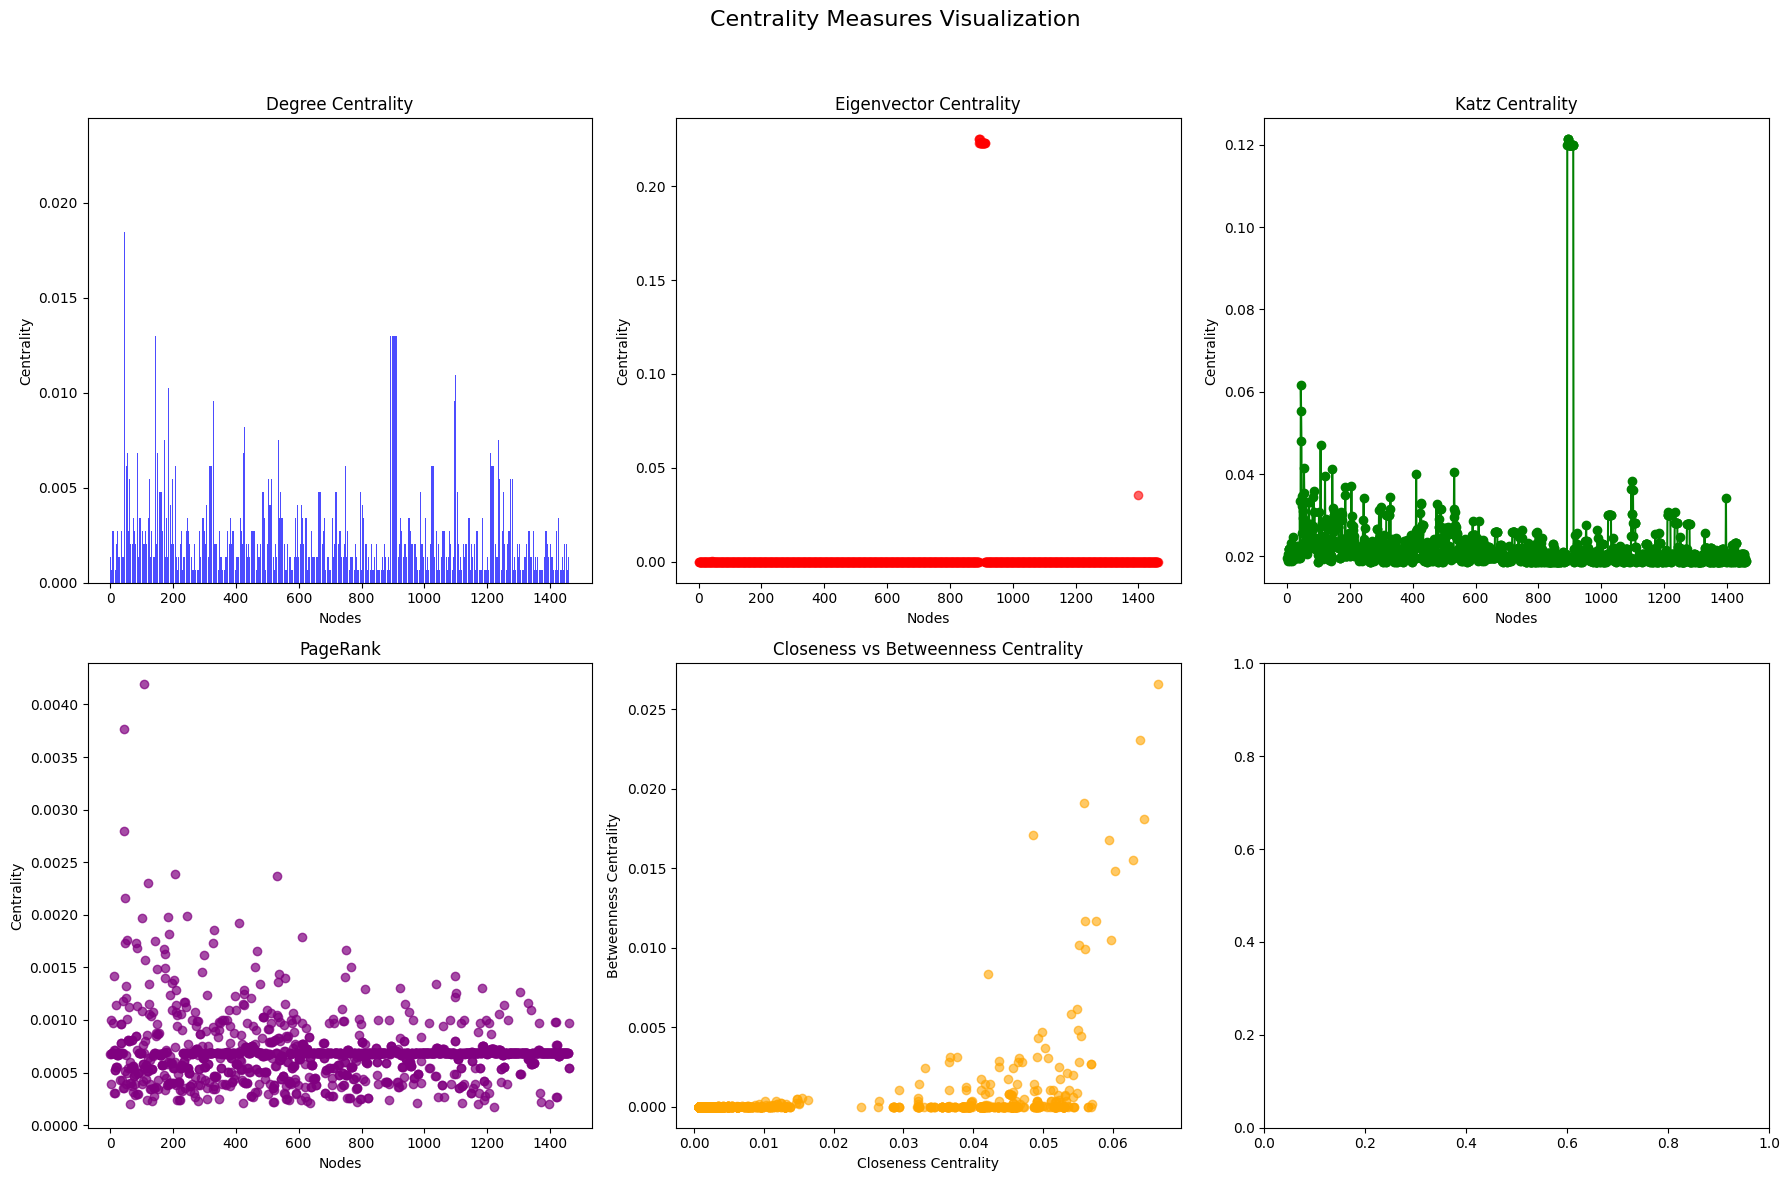

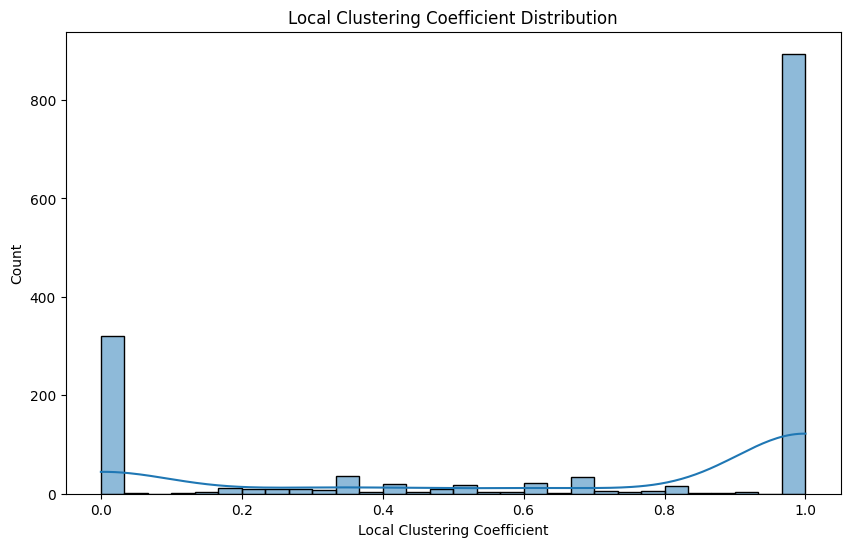

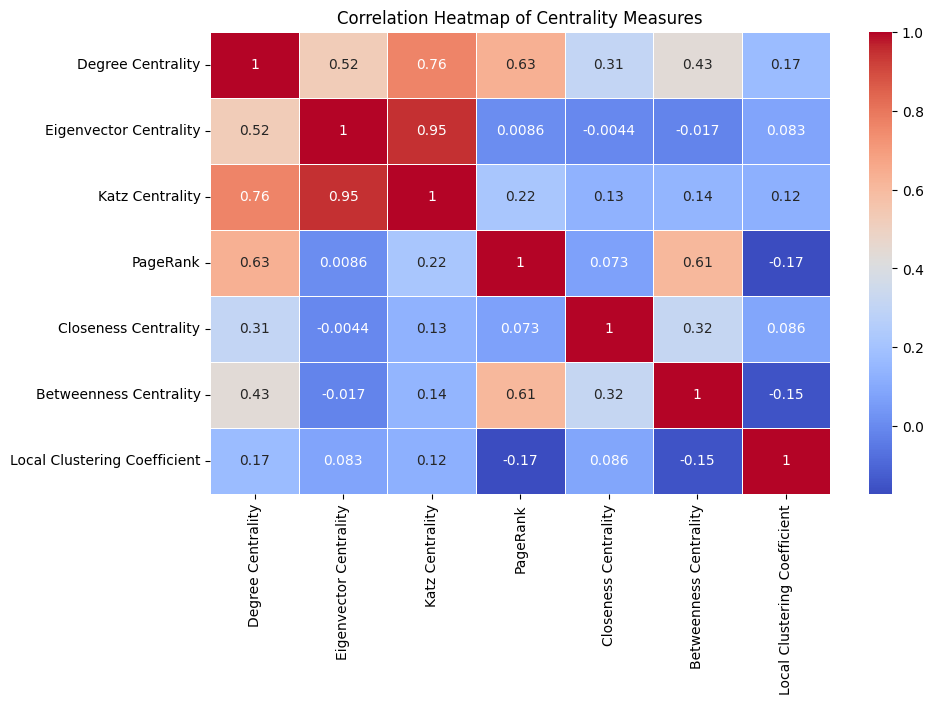

In [18]:
### 🎨 Visualization of Centrality Measures ###
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Centrality Measures Visualization", fontsize=16)

# 1️⃣ Degree Centrality - Bar Chart
axes[0, 0].bar(df.index, df["Degree Centrality"], color="blue", alpha=0.7)
axes[0, 0].set_title("Degree Centrality")
axes[0, 0].set_xlabel("Nodes")
axes[0, 0].set_ylabel("Centrality")

# 2️⃣ Eigenvector Centrality - Scatter Plot
axes[0, 1].scatter(df.index, df["Eigenvector Centrality"], color="red", alpha=0.6)
axes[0, 1].set_title("Eigenvector Centrality")
axes[0, 1].set_xlabel("Nodes")
axes[0, 1].set_ylabel("Centrality")

# 3️⃣ Katz Centrality - Line Plot
axes[0, 2].plot(df.index, df["Katz Centrality"], marker="o", linestyle="-", color="green")
axes[0, 2].set_title("Katz Centrality")
axes[0, 2].set_xlabel("Nodes")
axes[0, 2].set_ylabel("Centrality")

# 4️⃣ PageRank - Scatter Plot
axes[1, 0].scatter(df.index, df["PageRank"], color="purple", alpha=0.7)
axes[1, 0].set_title("PageRank")
axes[1, 0].set_xlabel("Nodes")
axes[1, 0].set_ylabel("Centrality")

# 5️⃣ Closeness vs Betweenness Centrality - Scatter
axes[1, 1].scatter(df["Closeness Centrality"], df["Betweenness Centrality"], color="orange", alpha=0.6)
axes[1, 1].set_title("Closeness vs Betweenness Centrality")
axes[1, 1].set_xlabel("Closeness Centrality")
axes[1, 1].set_ylabel("Betweenness Centrality")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Clustering Coefficient Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Local Clustering Coefficient'], bins=30, kde=True)
plt.title("Local Clustering Coefficient Distribution")
plt.show()

### 🔥 Heatmap of Centrality Measures ###
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Centrality Measures")
plt.show()


Visualization using Histogram

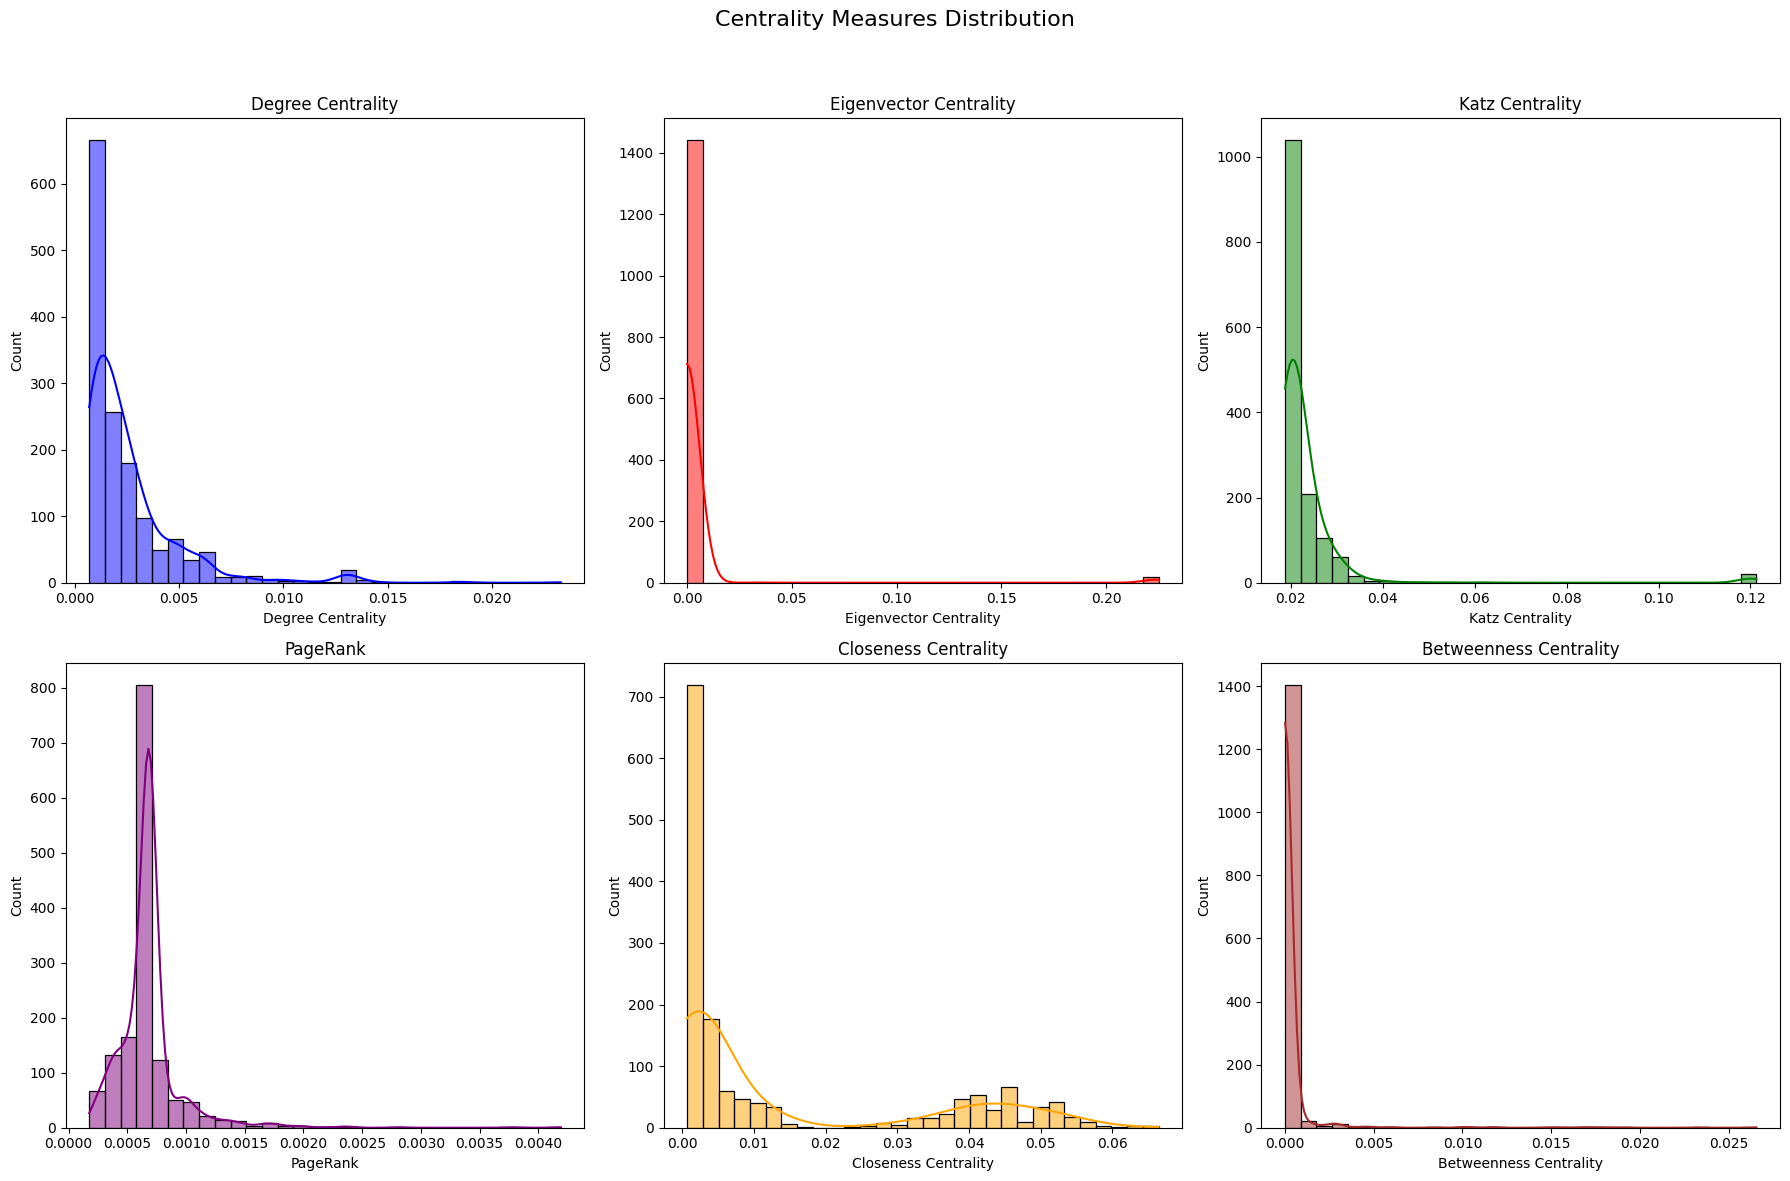

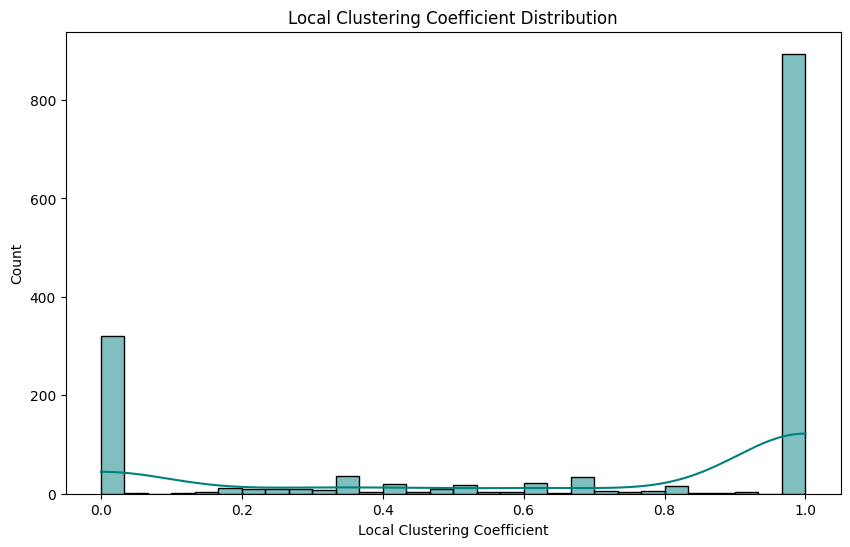

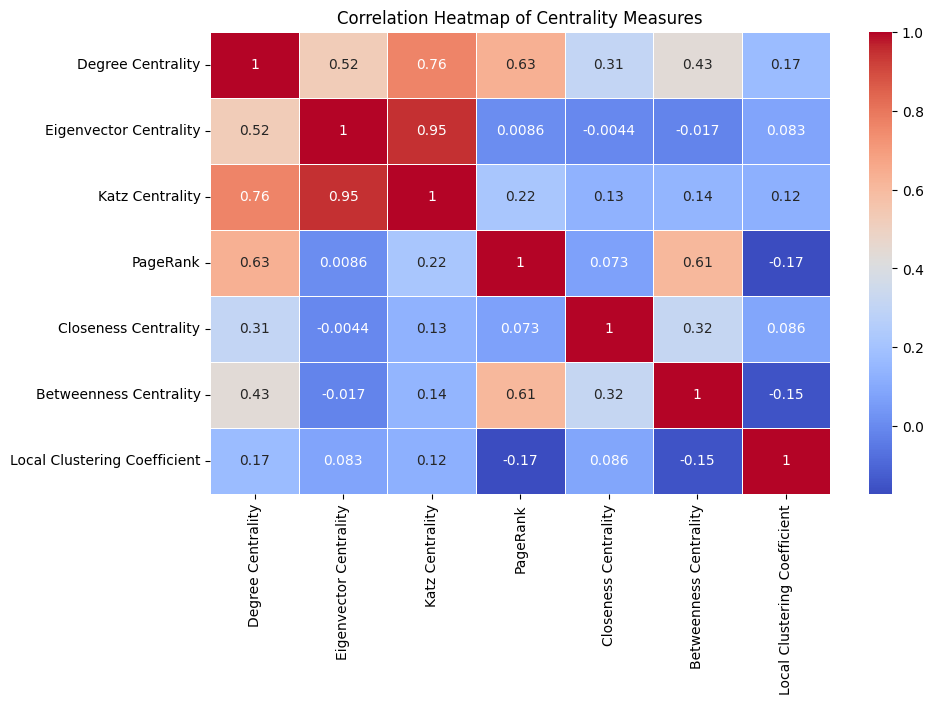

In [19]:
### 🎨 Histogram Visualization of Centrality Measures ###
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Centrality Measures Distribution", fontsize=16)

# 1️⃣ Degree Centrality - Histogram
sns.histplot(df["Degree Centrality"], bins=30, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Degree Centrality")

# 2️⃣ Eigenvector Centrality - Histogram
sns.histplot(df["Eigenvector Centrality"], bins=30, kde=True, color="red", ax=axes[0, 1])
axes[0, 1].set_title("Eigenvector Centrality")

# 3️⃣ Katz Centrality - Histogram
sns.histplot(df["Katz Centrality"], bins=30, kde=True, color="green", ax=axes[0, 2])
axes[0, 2].set_title("Katz Centrality")

# 4️⃣ PageRank - Histogram
sns.histplot(df["PageRank"], bins=30, kde=True, color="purple", ax=axes[1, 0])
axes[1, 0].set_title("PageRank")

# 5️⃣ Closeness Centrality - Histogram
sns.histplot(df["Closeness Centrality"], bins=30, kde=True, color="orange", ax=axes[1, 1])
axes[1, 1].set_title("Closeness Centrality")

# 6️⃣ Betweenness Centrality - Histogram
sns.histplot(df["Betweenness Centrality"], bins=30, kde=True, color="brown", ax=axes[1, 2])
axes[1, 2].set_title("Betweenness Centrality")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 🔥 Histogram of Local Clustering Coefficient ###
plt.figure(figsize=(10, 6))
sns.histplot(df['Local Clustering Coefficient'], bins=30, kde=True, color="teal")
plt.title("Local Clustering Coefficient Distribution")
plt.show()

### 🔥 Heatmap of Centrality Measures ###
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Centrality Measures")
plt.show()


Visualization of the Centrality Measures and Clustering Co efficients for the top 10 nodes in the Network

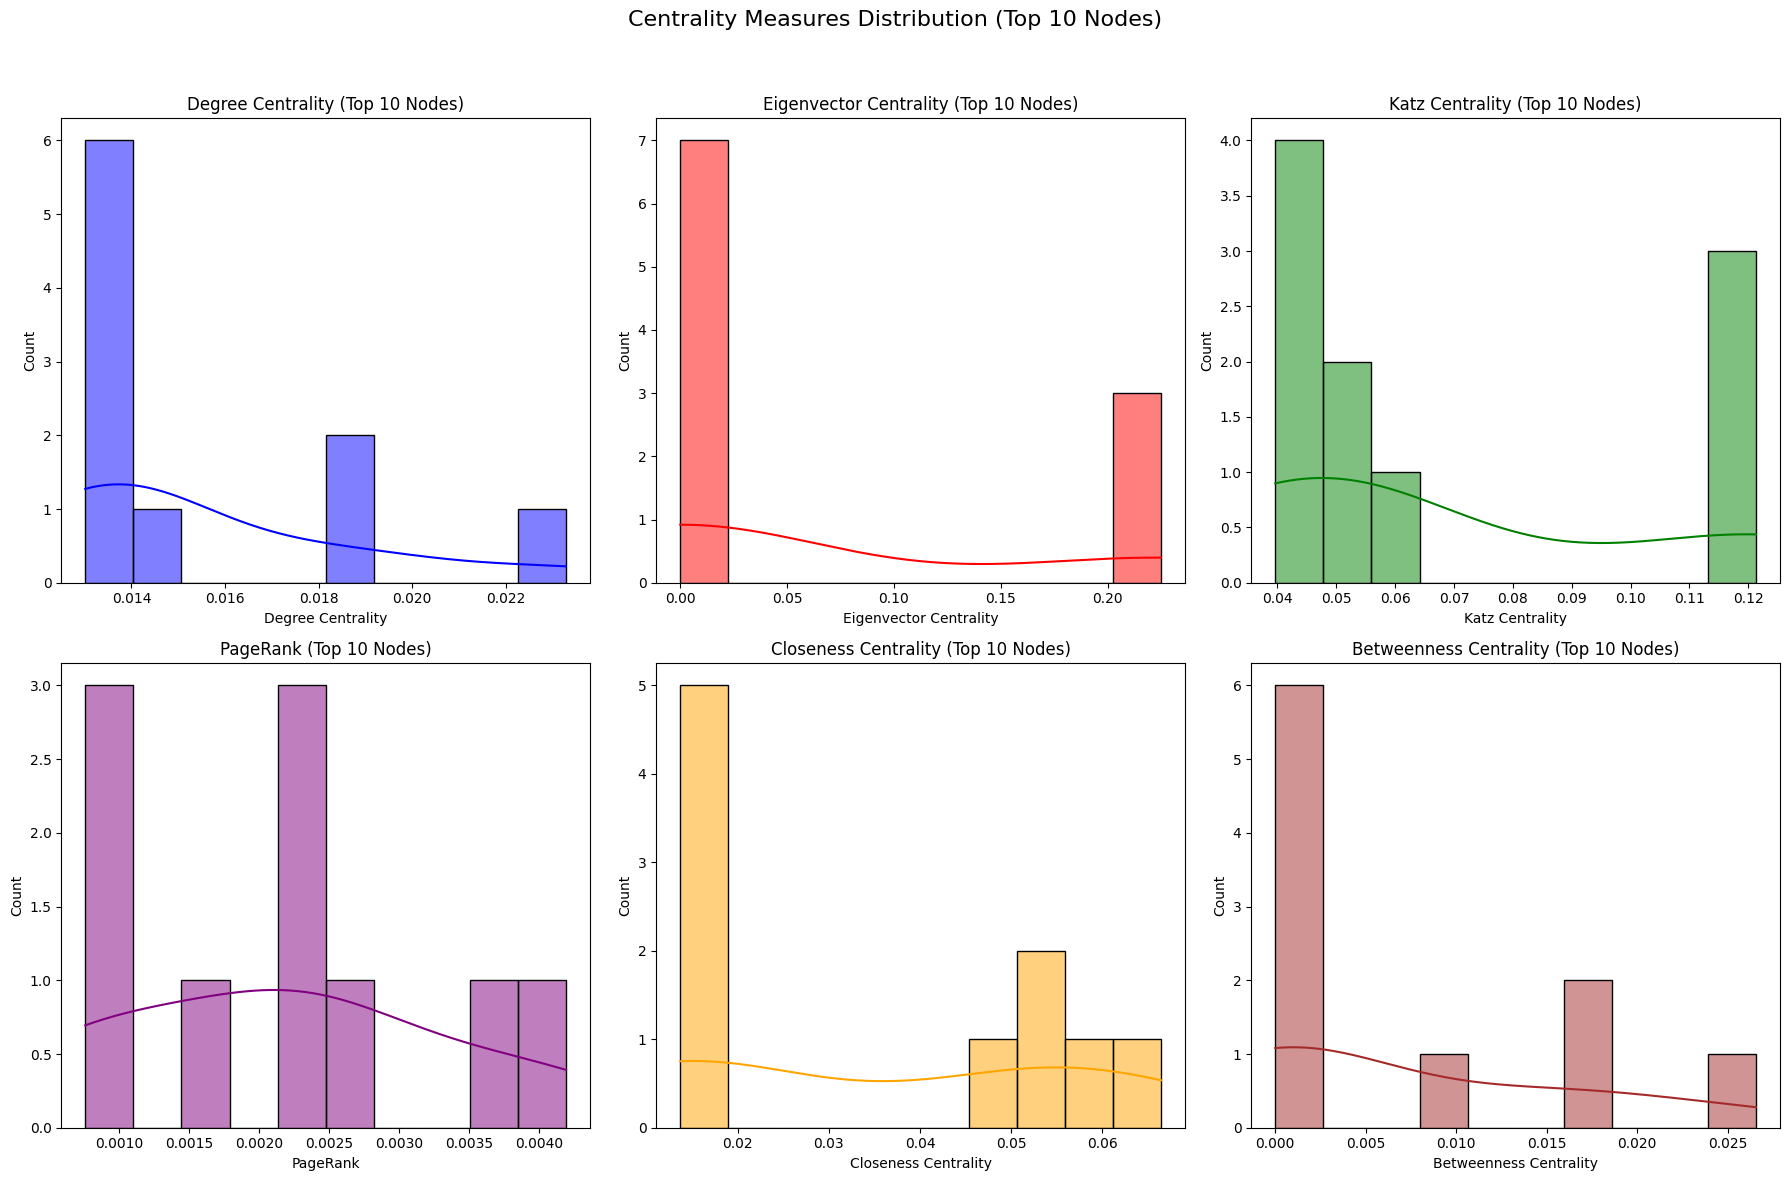

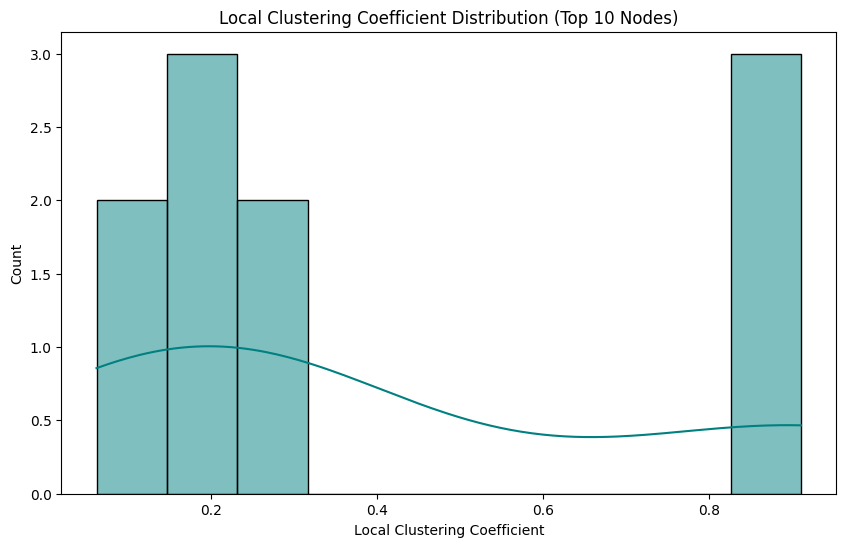

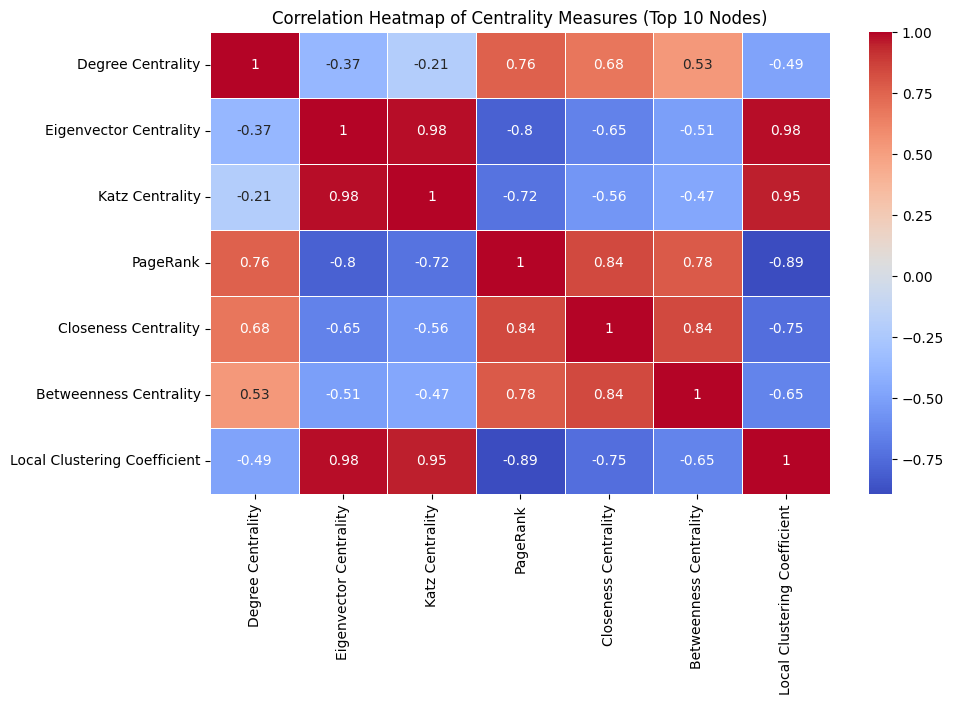

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Select the top 10 nodes based on Degree Centrality (or change to another metric)
top_10_nodes = df.nlargest(10, "Degree Centrality")  # Change metric if needed

### 🎨 Histogram Visualization of Centrality Measures (Top 10 Nodes) ###
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Centrality Measures Distribution (Top 10 Nodes)", fontsize=16)

# 1️⃣ Degree Centrality - Histogram
sns.histplot(top_10_nodes["Degree Centrality"], bins=10, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Degree Centrality (Top 10 Nodes)")

# 2️⃣ Eigenvector Centrality - Histogram
sns.histplot(top_10_nodes["Eigenvector Centrality"], bins=10, kde=True, color="red", ax=axes[0, 1])
axes[0, 1].set_title("Eigenvector Centrality (Top 10 Nodes)")

# 3️⃣ Katz Centrality - Histogram
sns.histplot(top_10_nodes["Katz Centrality"], bins=10, kde=True, color="green", ax=axes[0, 2])
axes[0, 2].set_title("Katz Centrality (Top 10 Nodes)")

# 4️⃣ PageRank - Histogram
sns.histplot(top_10_nodes["PageRank"], bins=10, kde=True, color="purple", ax=axes[1, 0])
axes[1, 0].set_title("PageRank (Top 10 Nodes)")

# 5️⃣ Closeness Centrality - Histogram
sns.histplot(top_10_nodes["Closeness Centrality"], bins=10, kde=True, color="orange", ax=axes[1, 1])
axes[1, 1].set_title("Closeness Centrality (Top 10 Nodes)")

# 6️⃣ Betweenness Centrality - Histogram
sns.histplot(top_10_nodes["Betweenness Centrality"], bins=10, kde=True, color="brown", ax=axes[1, 2])
axes[1, 2].set_title("Betweenness Centrality (Top 10 Nodes)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 🔥 Histogram of Local Clustering Coefficient (Top 10 Nodes) ###
plt.figure(figsize=(10, 6))
sns.histplot(top_10_nodes['Local Clustering Coefficient'], bins=10, kde=True, color="teal")
plt.title("Local Clustering Coefficient Distribution (Top 10 Nodes)")
plt.show()

### 🔥 Heatmap of Centrality Measures (Top 10 Nodes) ###
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_nodes.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Centrality Measures (Top 10 Nodes)")
plt.show()
